Projeto que envolve a raspagem, análise de dados e previsão de casos por série temporal de feminicídio no Estado de São Paulo por meio dos dados estatísticos da Secretaria de Segurança Pública do estado de São Paulo (SSP/SP) a partir de janeiro de 2018. <br><br>
Obs.: apesar da lei, que organiza banco de dados contendo índices de violência praticados contra a mulher no Estado de São Paulo, estar vigente desde 2011 (lei nº 14.545/2011), as ocorrências de feminicídio em boletins de ocorrência começaram a ser registradas somente a partir de janeiro de 2018.

-Esse projeto foi elaborado durante [as aulas do Data Viking](https://www.youtube.com/watch?v=MMcoDBLXCa4), em janeiro de 2022.-

## **1ª aula - Web Scraping**

In [42]:
import requests #biblioteca de http
from bs4 import BeautifulSoup
import pandas as pd

In [43]:
#site da SSP/SP
site = 'http://www.ssp.sp.gov.br/Estatistica/ViolenciaMulher.aspx'

#carregando
pagina = requests.get(site)

In [44]:
#raspando as informacoes
coleta = BeautifulSoup(pagina.text, 'html.parser')

In [45]:
#acessando titulo
print(coleta.title)

#acessando o nome dentro das tags do site
print(coleta.title.string)

#extraindo o nome da tag
print(coleta.title.name)

<title>
	SSP
</title>

	SSP

title


In [46]:
#coletando a tag
print(coleta.a , '\n')

#coletando o link dentro da tag
print(coleta.a.get('href') )

<a href="http://www.saopaulo.sp.gov.br/" target="_blank">Portal do Governo</a> 

http://www.saopaulo.sp.gov.br/


In [47]:
#loop para extrair os links
for Loop in coleta.find_all('a'):

  #pegando o link da tag
  link = Loop.get('href')

  #verificando se existe um link externo
  if 'http://' in str(link) :
    print(link)

  else:
    pass

http://www.saopaulo.sp.gov.br/
http://www.policiamilitar.sp.gov.br/
http://www.policiacivil.sp.gov.br/
http://www.policiacientifica.sp.gov.br/
http://www.saopaulo.sp.gov.br/sis/noticias.asp
http://www.poupatempo.sp.gov.br/
http://www.acessasaopaulo.sp.gov.br/
http://www.e-negociospublicos.com.br/
http://www.sap.sp.gov.br/
http://www.agricultura.sp.gov.br/
http://www.desenvolvimentosocial.sp.gov.br/
http://www.casacivil.sp.gov.br/
http://www.casamilitar.sp.gov.br/
http://www.comunicacao.sp.gov.br/
http://www.cultura.sp.gov.br/
http://www.desenvolvimento.sp.gov.br/
http://www.pessoacomdeficiencia.sp.gov.br/
http://www.planejamento.sp.gov.br/
http://www.educacao.sp.gov.br/
http://www.emprego.sp.gov.br/
http://www.ensinosuperior.sp.gov.br/
http://www.sejel.sp.gov.br/
http://www.fazenda.sp.gov.br/
http://www.gestaopublica.sp.gov.br/
http://www.habitacao.sp.gov.br/
http://www.justica.sp.gov.br/
http://www.ambiente.sp.gov.br/
http://www.pge.sp.gov.br/
http://www.relacoesinstitucionais.sp.gov.

In [48]:
#minerando uma informação da Pagina. No caso, um período de tempo
coleta.find( id='conteudo_repPeriodo_lblPeriodo_2' ).get_text().split()[-3:]

['Novembro', 'de', '2021']

In [49]:
#buscando todas as tabelas
tabelas = coleta.find_all('table', attrs={'class':'table table-striped table-hover table-condensed'} )

print('Total de tabelas localizadas:', len(tabelas))

Total de tabelas localizadas: 123


In [52]:
#criando listas para salvar os dados
rotulos = []
dados = []
periodos = []

#funcao para criar uma data
import datetime
from dateutil.relativedelta import relativedelta

#ultima data publicada pela SSP/SP
registro_inicial = datetime.datetime(2021, 11, 1)

#variavel de apoio
loop = 0

#loop
for consulta in tabelas:

  #linhas
  linha = consulta.find_all('tr')[2]

  #rotulo da tabela
  rotulo = linha.find_all('td')[0].text

  #valor da tabela
  informacao = linha.find_all('span')[0].text

  #periodo do loop
  data = registro_inicial - relativedelta( months=loop )

  #condicao para verificar se é feminicído
  if rotulo == 'FEMINICÍDIO':
    dados.append(informacao)
    rotulos.append(rotulo)
    periodos.append(data)

  #em caso contrario, passa
  else:
    pass

  loop += 1

In [53]:
#organizando essas informacoes num dicionario
dicionario = {
    'Rótulo' : rotulos,
    'Quantidade' : dados,
    'Período' : periodos
}

#criando o dataframe
base_dados = pd.DataFrame(dicionario)

#exportando os dados para o excel
base_dados.to_excel('Base_Dados - Feminicidio.xlsx', index=False)

print('A base de dados tem formato:', base_dados.shape)

A base de dados tem formato: (47, 3)


## **2ª aula - Data Visualization**

In [54]:
base_dados.head()

,Rótulo,Quantidade,Período
0,FEMINICÍDIO,9,2021-11-01
1,FEMINICÍDIO,9,2021-10-01
2,FEMINICÍDIO,6,2021-09-01
3,FEMINICÍDIO,8,2021-08-01
4,FEMINICÍDIO,8,2021-07-01


In [55]:
base_dados.tail()

,Rótulo,Quantidade,Período
42,FEMINICÍDIO,16,2018-05-01
43,FEMINICÍDIO,14,2018-04-01
44,FEMINICÍDIO,8,2018-03-01
45,FEMINICÍDIO,8,2018-02-01
46,FEMINICÍDIO,5,2018-01-01


In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [57]:
#checando campos nulos
base_dados.isnull().sum()

Rótulo        0
Quantidade    0
Período       0
dtype: int64

In [60]:
#analisar o tipo da informacao contida na base de dados
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Rótulo      47 non-null     object        
 1   Quantidade  47 non-null     int64         
 2   Período     47 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.2+ KB


In [61]:
#converter o campo "Quantidade" para numerico
base_dados['Quantidade'] = pd.to_numeric(base_dados['Quantidade'])

base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Rótulo      47 non-null     object        
 1   Quantidade  47 non-null     int64         
 2   Período     47 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.2+ KB


In [62]:
#mostrando a análise estatística básica
base_dados.describe()

,Quantidade
count,47.000000
mean,13.297872
std,5.384821
min,5.000000
25%,9.000000
50%,13.000000
75%,17.000000
max,27.000000


In [66]:
#incluir o termo 'Período' como índice
dados = base_dados.set_index('Período')

dados.head()

,Rótulo,Quantidade
Período,,
2021-11-01,FEMINICÍDIO,9
2021-10-01,FEMINICÍDIO,9
2021-09-01,FEMINICÍDIO,6
2021-08-01,FEMINICÍDIO,8
2021-07-01,FEMINICÍDIO,8


In [67]:
#retirar a coluna "Rótulo"
dados.drop(columns='Rótulo', inplace=True )

dados.head()

,Quantidade
Período,
2021-11-01,9
2021-10-01,9
2021-09-01,6
2021-08-01,8
2021-07-01,8


Testando gráfico em linha das bibliotecas Matplot, Seaborn e Plotly

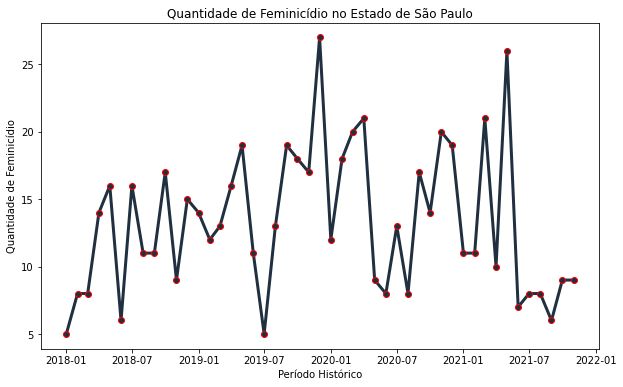

In [68]:
#Matplot 

#tamanho da imagem
plt.figure( figsize=(10, 6))

#titulo
plt.title('Quantidade de Feminicídio no Estado de São Paulo')

#labels
plt.xlabel('Período Histórico')
plt.ylabel('Quantidade de Feminicídio')

plt.plot(dados, color='#203040', linewidth=3, marker='o', markeredgecolor='red');

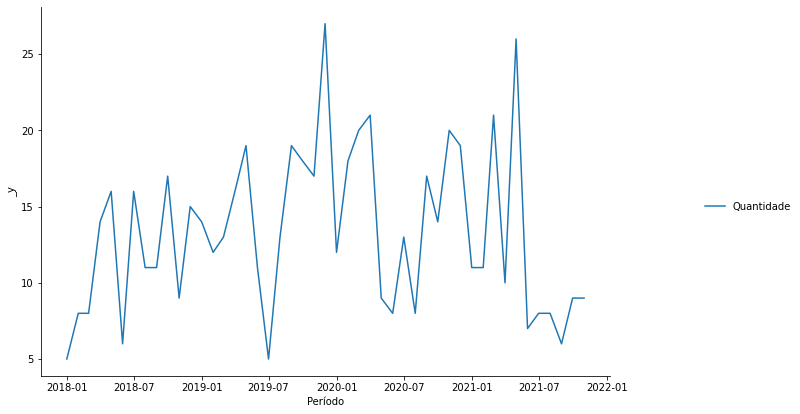

In [69]:
#Seaborn 

#plot do Seaborn de linhas
sns.relplot(data=dados, kind='line' )

#ajuste do tamanho
plt.gcf().set_size_inches(12, 6)

In [72]:
#Plotly
px.line(dados, y='Quantidade', x=dados.index, width=700, height=500 )

Testando gráfico de boxplot das bibliotecas Matplot, Seaborn e Plotly

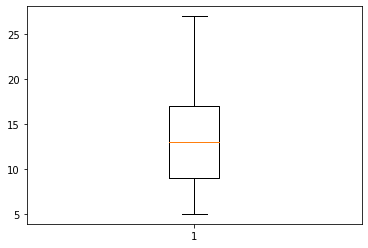

In [73]:
# Matplotlib - Boxplot
plt.boxplot(x=dados['Quantidade']);

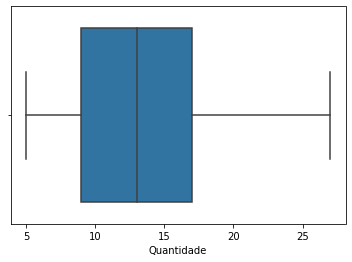

In [74]:
# Seaborn - Boxplot
sns.boxplot(x=dados['Quantidade']);

In [75]:
# Plotly - Boxplot
px.box(dados, y='Quantidade', width=500)

Testando gráfico em barra das bibliotecas Matplot, Seaborn e Plotly

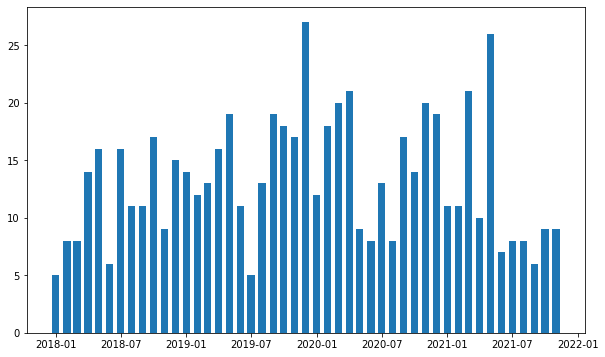

In [76]:
# Matplot - Barras
plt.figure( figsize=(10, 6) )
plt.bar(dados.index, dados['Quantidade'], width=20 );

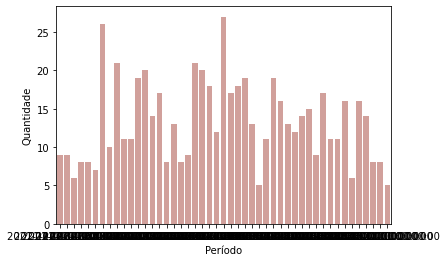

In [77]:
# Seaborn - Barras
sns.barplot( x=dados.index, y='Quantidade', data=dados, color='salmon', saturation=0.4);

In [78]:
# plotly - Barras
px.bar(dados, x=dados.index, y='Quantidade')

In [81]:
#media movel a cada trimestre
dados.sort_index(inplace=True)

In [82]:
#gerando a media movel
dados['Média Móvel'] = dados.rolling(3).mean()

dados.head()

,Quantidade,Média Móvel
Período,,
2018-01-01,5,NaN
2018-02-01,8,NaN
2018-03-01,8,7.000000
2018-04-01,14,10.000000
2018-05-01,16,12.666667


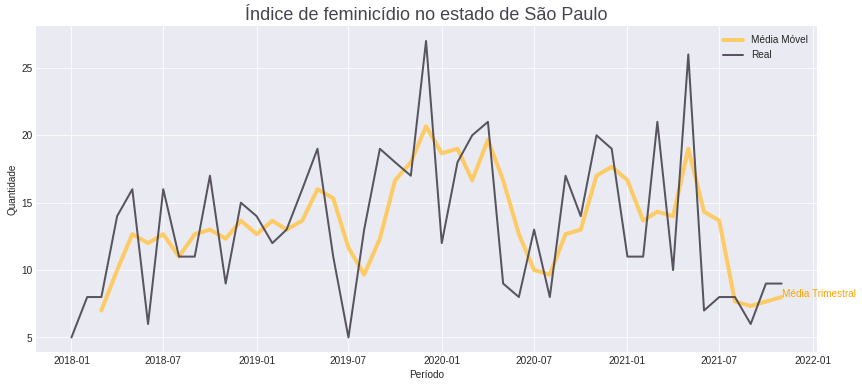

In [84]:
#alterando o estilo do matplot
plt.style.use('seaborn-darkgrid')

#alterar o tamanho
plt.figure(figsize=(14, 6))

#plotar a media movel
plt.plot(dados.index, dados['Média Móvel'],linewidth=4, alpha=0.9, color='#ffc857')

#incluir o nome da linha
plt.text(dados.index[-1], dados['Média Móvel'].tail(1), 'Média Trimestral', color='orange')

#plotar o valor real
plt.plot(dados.index, dados['Quantidade'], linewidth=2, alpha=0.9, color='#474350')

#labels
plt.xlabel('Período')
plt.ylabel('Quantidade')

#legenda
plt.legend(['Média Móvel', 'Real'])

#titulo
plt.title('Índice de feminicídio no estado de São Paulo', loc='center', fontsize=18, color='#474350');

## **3ª aula - Série Temporal**

In [85]:
#ajustar os dados
dados_serie = dados.drop(columns='Média Móvel')

In [91]:
#dividindo dados para treino e para teste do modelo

#Dados de Treino
treino = round(len(dados_serie) * 0.80) #80%

#Dados de Teste
teste = len(dados_serie) - treino #20%

print(f'Vamos ter {treino} registros no TREINO do modelo')
print(f'Vamos ter {teste} registros no TESTE do modelo')

Vamos ter 38 registros no TREINO do modelo
Vamos ter 9 registros no TESTE do modelo


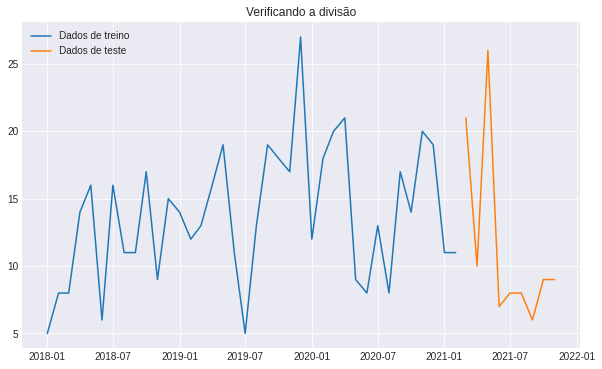

In [92]:
#verificar a divisao
dados_treino = dados_serie[0:treino]
dados_teste = dados_serie[-teste:]

#tamanho do grafico
plt.figure(figsize=(10, 6))

#plots dos valores
plt.plot(dados_treino)
plt.plot(dados_teste)

#titulo
plt.title('Verificando a divisão')

#legenda
plt.legend(['Dados de treino', 'Dados de teste']);

In [90]:
#retirar avisos
import warnings
warnings.filterwarnings('ignore')

#criando o modelo de machine learning
from statsmodels.tsa.api import ExponentialSmoothing

#definir os parametros do modelo
funcao_serie_temporal = ExponentialSmoothing(
    dados_treino,
    seasonal_periods=7,
    trend='additive',
    seasonal='additive').fit()

In [93]:
#fazendo as previsoes
previsao = funcao_serie_temporal.forecast(teste)

#incluir esses dados em um dataframe
base_previsao = pd.DataFrame(previsao)

#renomear a coluna
base_previsao.rename(columns={0:'Previsão'}, inplace=True)

#join (unir Teste com Previsao)
juntando_bases = pd.concat([dados_teste,base_previsao], axis=1)

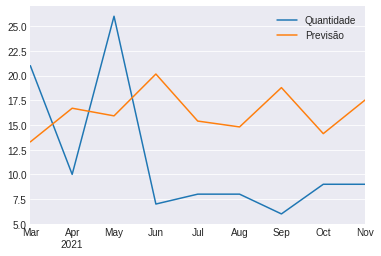

In [94]:
#plotando
juntando_bases.plot();

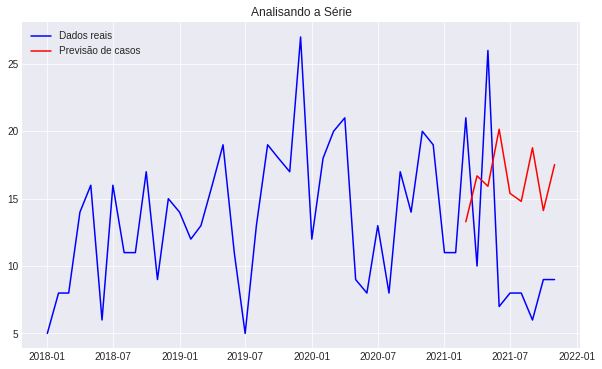

In [98]:
#plotando
juntando_bases2 = pd.concat([dados_serie, base_previsao])

plt.figure(figsize=(10, 6) )
plt.title('Analisando a Série')
plt.plot(dados_serie, 'blue')
plt.plot(base_previsao, 'red');

#legenda
plt.legend(['Dados reais', 'Previsão de casos']);

Checando o RMSE (root mean squared error), erro quadrático médio, que é uma medida usada para estudar as diferenças entre os valores previstos por um modelo ou estimador e os valores observados.

In [99]:
#erro do modelo
from sklearn.metrics import mean_squared_error  #RMSE

#calcular o erro
mean_squared_error(dados_teste, previsao, squared=False)

9.080957529684646

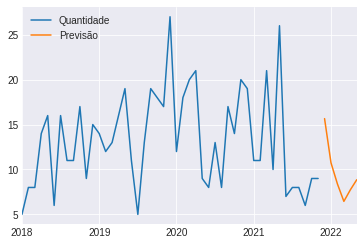

In [108]:
#prever proximo semestre

#definir os parametros do modelo
funcao_serie_temporal_02 = ExponentialSmoothing(
    dados_serie,
    seasonal_periods=7,
    trend='additive',
    seasonal='additive').fit()

#fazendo as previsoes
previsao = funcao_serie_temporal_02.forecast(6)

#incluir esses dados em um dataframe
base_previsao = pd.DataFrame(previsao)

#renomear a coluna
base_previsao.rename(columns={0:'Previsão'}, inplace=True)

#join (Unir Teste com Previsao)
juntando_bases = pd.concat([dados_serie, base_previsao], axis=1)

juntando_bases.plot();

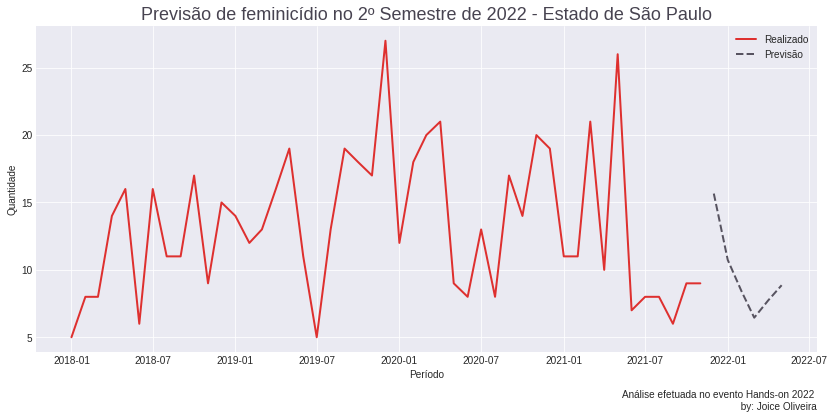

In [109]:
#alterando o estilo do matplot
plt.style.use('seaborn-darkgrid')

#alterar o tamanho
plt.figure(figsize=(14, 6))

#plotar media movel
plt.plot(juntando_bases['Quantidade'], linewidth=2, alpha=0.9, color='#dd1c1a')

#plotar o valor real
plt.plot(juntando_bases['Previsão'], linestyle='dashed', linewidth=2, alpha=0.9, color='#474350')

#labels
plt.xlabel('Período')
plt.ylabel('Quantidade')

#legenda
plt.legend(['Realizado', 'Previsão'])

#titulo
plt.title('Previsão de feminicídio no 2º Semestre de 2022 - Estado de São Paulo', loc='center', fontsize=18, color='#474350' )

#anotacao
plt.annotate(
    'Análise efetuada no evento Hands-on 2022 \n by: Joice Oliveira',
    xy = (1.0, -0.15),
    xycoords='axes fraction',
    ha = 'right',
    va = 'center',
    fontsize=10
);